<a href="https://colab.research.google.com/github/LeonardoGoncRibeiro/04_DataScience_And_Visualization/blob/main/02_DataVisualization_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Data Visualization

In this course, we will learn more about data visualization. Thus, we will have some data and we will try to make it easier for the viewer to understand what our data is saying. Also, we will see how to make and edit many different plots using Python. Note that graphs are very important to allow for a more effective conversation with our final user.

Thus, we will learn which graphs are more adequate to show a given information. Then, we will get to learn how to improve our graphs by taking out some unnecessary information, and including important features. Finally, we will understand how to use colors in our graphs, and some "bad practices" to run away from when plotting informative graphs.

# Tables and line plots

First, we will start with the basics: working with tables and line plots. First, let's get our data:

In [136]:
import pandas as pd

inv_dict = {"Month" : ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
            "Investment" : [800, 400, 1100, 400, 500, 750, 1500, 650, 850, 400, 1000, 720]}

investment = pd.DataFrame(inv_dict)
investment

,Month,Investment
0,jan,800
1,feb,400
2,mar,1100
3,apr,400
4,may,500
5,jun,750
6,jul,1500
7,aug,650
8,sep,850
9,oct,400


Nice! Here, we have some data from investments for a given user. It is hard to understand the amount invested by just looking at the table. Let's make a graph to help us to visualize this:

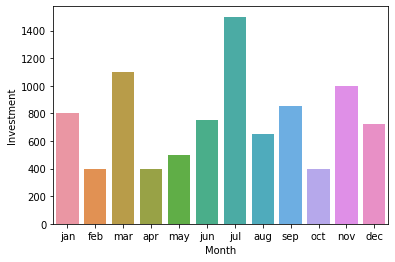

In [137]:
import seaborn as sns

sns.barplot(x = 'Month', y = 'Investment', data = investment)

Nice! Using a barplot we were able to check, for example, that our investments were higher on July! When we deal with time series, we usually use line plots:

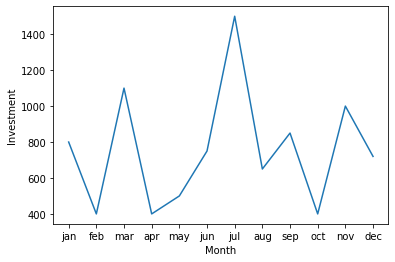

In [138]:
sns.lineplot(x = 'Month', y = 'Investment', data = investment)

Great! Using a line plot we are able to see the same information as the bar plot, but now we can understand more easily the variation between months (by looking if the line is "increasing" or "decreasing"). Let's improve our graph:

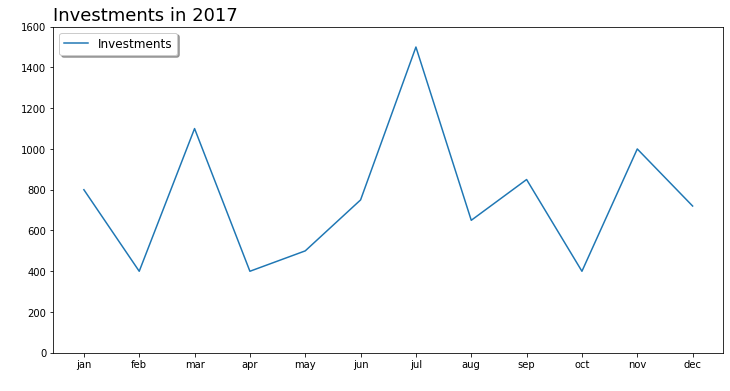

In [139]:
ax = sns.lineplot(x = 'Month', y = 'Investment', data = investment, label = 'Investments')

ax.set_ylim([0, 1600])                                              # Changing y limits

ax.set_title("Investments in 2017", fontsize = 18, loc = 'left')    # Creating a title for our graph
ax.set_xlabel(" ")                                                  # Taking the xlabel out of our figure
ax.set_ylabel(" ")                                                  # Taking the ylabel out of our figure

ax.legend(loc = 'upper left', shadow = True, fontsize = 12)         # Adding a legend

ax.figure.set_size_inches(12, 6)                                    # Changing the size of our graph

Nice! Note that, by changing just some parameters, we were able to improve the visualization of our graph and pass more information to the final user. Also, we have removed some unnecessary information, such as the $x$ and $y$ labels: by the title and the legend, it already becomes clear that the graph is about investments per month.

Also, note that, before, our graph was showing investments from 400 to 1500. However, this may give a wrong sense that, in some months, we invested very little. Thus, we redefined these limits.

## How to choose a design for our graph?

When working with data visualization, we have to keep in mind that we are making a graph for someone to understand our data more easily. For instance, if it is important to know the values in our graph (or at least an estimate of them), it might be wise to add grid lines and markers:

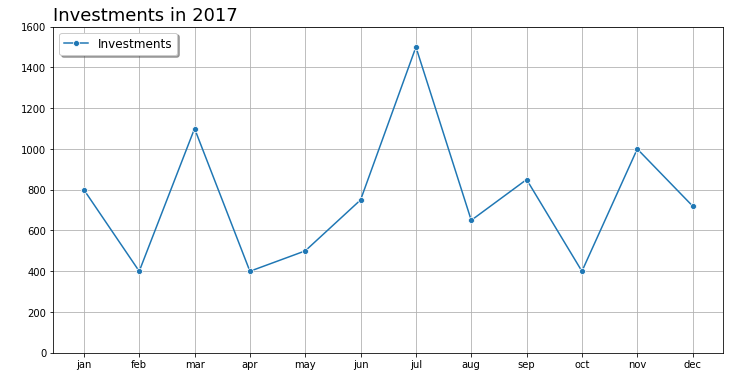

In [140]:
import matplotlib.pyplot as plt

ax = sns.lineplot(x = 'Month', y = 'Investment', data = investment, marker='o', label = 'Investments')

plt.grid()                                                          # Adding a grid

ax.set_ylim([0, 1600])                                              # Changing y limits

ax.set_title("Investments in 2017", fontsize = 18, loc = 'left')    # Creating a title for our graph
ax.set_xlabel(" ")                                                  # Taking the xlabel out of our figure
ax.set_ylabel(" ")                                                  # Taking the ylabel out of our figure

ax.legend(loc = 'upper left', shadow = True, fontsize = 12)         # Adding a legend

ax.figure.set_size_inches(12, 6)                                    # Changing the size of our graph

However, note that, the more information we add to our graph, the harder it is to focus on its main goal. Thus, choosing the best visualization options always depend on what information we may want the final user to see and extract from the graph.

We can also use line plots to highlight some information from our graph. For instance, note that, from april to july, our investments increased very quickly. Let's try to highlight this increase:

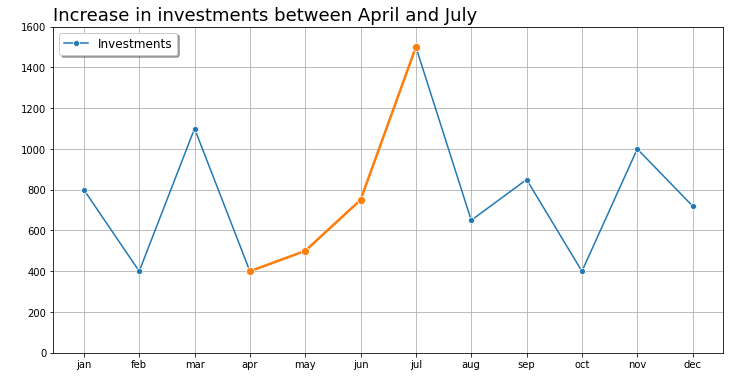

In [141]:
ax = sns.lineplot(x = 'Month', y = 'Investment', data = investment, marker='o', label = 'Investments')
ax = sns.lineplot(x = 'Month', y = 'Investment', data = investment.query("Month in ['apr', 'may', 'jun', 'jul']"), linewidth = 2.5, marker = 'o', markersize = 8)

plt.grid()                                                                                     # Adding a grid

ax.set_ylim([0, 1600])                                                                         # Changing y limits

ax.set_title("Increase in investments between April and July", fontsize = 18, loc = 'left')    # Creating a title for our graph
ax.set_xlabel(" ")                                                                             # Taking the xlabel out of our figure
ax.set_ylabel(" ")                                                                             # Taking the ylabel out of our figure

ax.legend(loc = 'upper left', shadow = True, fontsize = 12)                                    # Adding a legend

ax.figure.set_size_inches(12, 6)                                                               # Changing the size of our graph

Nice! Now, we can see more easily the region where we see a rapid increase in the investments performed. We actually did so by drawing another lineplot, and making this plot with more width!

Note that we also changed the graph title so that it better represents what we want to show.

# Analyzing data from different groups

So, we have already seen how investments change over the year for a given person. Now, let's add more information regarding the investments of different people:

In [142]:
investment['Person'] = ['Anna']*investment.shape[0]

In [143]:
investment

,Month,Investment,Person
0,jan,800,Anna
1,feb,400,Anna
2,mar,1100,Anna
3,apr,400,Anna
4,may,500,Anna
5,jun,750,Anna
6,jul,1500,Anna
7,aug,650,Anna
8,sep,850,Anna
9,oct,400,Anna


Now, let's add data from diferent people:

In [144]:
inv_dict_joao = {"Month" : ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
                 "Investment" : [800, 400, -1100, -400, -500, -750, -1500, -650, -850, -400, -1000, -720],
                 "Person" : ['João']*12}

inv_dict_camila = {"Month" : ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
                   "Investment" : [800, 400, -55, 20, -25, 37.5, -75, 32.5, -42.5, 20, -50, 36],
                   "Person" : ['Camila']*12}

inv_df_joao = pd.DataFrame(inv_dict_joao)
inv_df_camila = pd.DataFrame(inv_dict_camila)

investment = investment.append(inv_df_joao).append(inv_df_camila).reset_index(drop = True)

Ok! Now, we have added information for other people. This allows us to perform comparisons from our graphs.

In [145]:
investment

,Month,Investment,Person
0,jan,800.0,Anna
1,feb,400.0,Anna
2,mar,1100.0,Anna
3,apr,400.0,Anna
4,may,500.0,Anna
5,jun,750.0,Anna
6,jul,1500.0,Anna
7,aug,650.0,Anna
8,sep,850.0,Anna
9,oct,400.0,Anna


Nice! Now, let's draw our line plot. This time, to plot the line plot for different people, we will use the hue parameter:

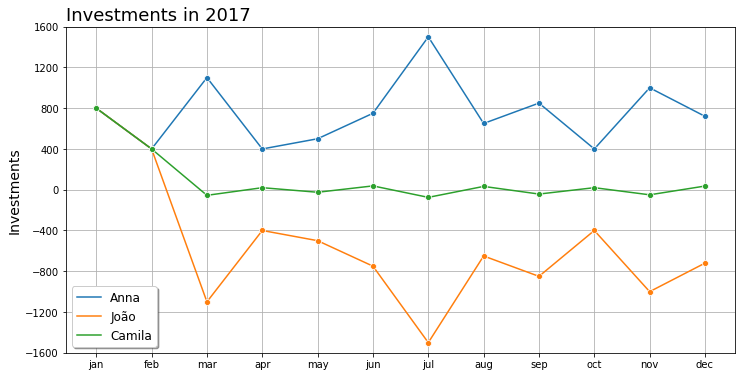

In [146]:
import numpy as np

ax = sns.lineplot(x = 'Month', y = 'Investment', hue = 'Person', data = investment, marker='o')

plt.grid()                                                          # Adding a grid

ax.set_ylim([-1600, 1600])                                          # Changing y limites
ax.set_yticks(np.linspace(-1600, 1600, 9))                          # Adjusting y ticks

ax.set_title("Investments in 2017", fontsize = 18, loc = 'left')    # Creating a title for our graph
ax.set_xlabel(" ")                                                  # Taking the xlabel out of our figure
ax.set_ylabel("Investments", fontsize = 14)                         # Changing the y label and setting its fontsize.

ax.legend(loc = 'lower left', shadow = True, fontsize = 12)         # Adding a legend

ax.figure.set_size_inches(12, 6)                                    # Changing the size of our graph

Note that, here, we changed the $y$-axis limits to allow us to see the graph results! Also, we adjusted the $y$-ticks. By looking at the line plots, we see that, in the first months, the investments are very similar. However, after March, investments are very different: João actually lost a lot of money, while Camila had very low investments.

Note that we can still make a graph for only one person by using a query:

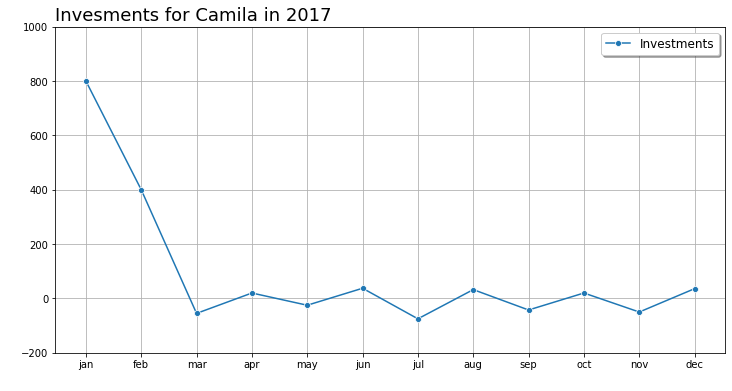

In [147]:
ax = sns.lineplot(x = 'Month', y = 'Investment', data = investment.query("Person == 'Camila'"), marker='o', label = 'Investments')

plt.grid()                                                                                     # Adding a grid

ax.set_ylim([-200, 1000])                                                                      # Changing y limits

ax.set_title("Invesments for Camila in 2017", fontsize = 18, loc = 'left')                     # Creating a title for our graph
ax.set_xlabel(" ")                                                                             # Taking the xlabel out of our figure
ax.set_ylabel(" ")                                                                             # Taking the ylabel out of our figure

ax.legend(loc = 'upper right', shadow = True, fontsize = 12)                                    # Adding a legend

ax.figure.set_size_inches(12, 6)                                                               # Changing the size of our graph

Nice! Here, we see the investments only for Camila. 

Note that Camila started gaining a lot of money but, later, gains and losses were very marginal. To better understand the trend, we can show a regression line using a *lmplot( )*:

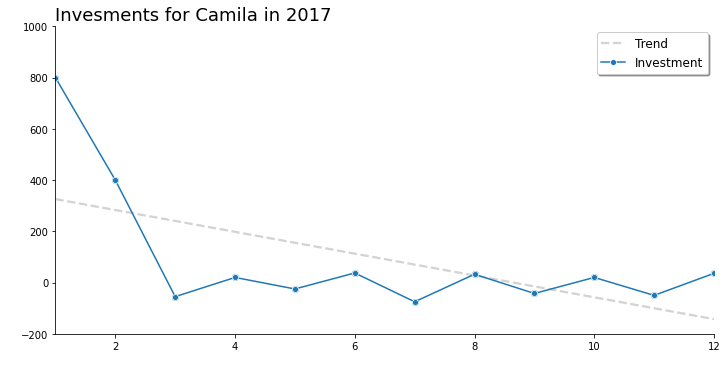

In [148]:
investment['MonthInt'] = investment.Month
investment.MonthInt = investment.MonthInt.map({'jan' : 1, 'feb' : 2, 'mar' : 3, 'apr' : 4, 'may' : 5, 'jun' : 6, 
                                               'jul' : 7, 'aug' : 8, 'sep' : 9, 'oct' : 10, 'nov' : 11, 'dec' : 12})

ax  = sns.lmplot(x = 'MonthInt', y = 'Investment', data = investment.query("Person == 'Camila'"), aspect = 2, ci = False, line_kws={'color': 'lightgray', 'linestyle' : '--'})
ax2 = sns.lineplot(x = 'MonthInt', y = 'Investment', data = investment.query("Person == 'Camila'"), marker='o')                                                                          

ax.set(xlim=(1, 12))                                                                    # Changing x limits
ax.set(ylim=(-200, 1000))                                                               # Changing y limits

ax.axes[0,0].set_title("Invesments for Camila in 2017", fontsize = 18, loc = 'left')    # Creating a title for our graph
ax.axes[0,0].set_xlabel(" ")                                                            # Taking the xlabel out of our figure
ax.axes[0,0].set_ylabel(" ")                                                            # Taking the ylabel out of our figure

plt.legend(loc = 'upper right', shadow = True, fontsize = 12, labels=['Trend', 'Investment'])

Note that, here, we first changed the months to integer values from 1 to 12. Using a lmplot, we note that there is a downward trend. Also, since we dont want the trend to be the major focal point in our graph, we changed its color to a light gray. Also, we added a line style so that, even if we are unable to see the colors of our plot, we are still able to identify which plot is which.

A tip for making better graphs is to try to make the user perform a Z vision pattern. For instance, here, the viewer will see the graph title (at the left), then the legend (at the right), then the start of the plot (at the left) to the end the the plot (at the right). This is known as a Z vision, and is very natural for the human eye. More about this can be found in:

http://vanseodesign.com/web-design/3-design-layouts/

Also, note that, here, our plot as a Facet Grid. Thus, the methods for changing the graph properties are different.

Nice! Now, let's try to extract more information from our data. Let's evaluate the percentage of positive investments for each person:

In [149]:
investment_grouped = investment.groupby('Person')
positive_investment_grouped = investment.query("Investment >= 0").groupby('Person')

percent = positive_investment_grouped.Investment.count( ) / investment_grouped.Investment.count( )
percent = percent.to_frame( ).reset_index( )
percent

,Person,Investment
0,Anna,1.000000
1,Camila,0.583333
2,João,0.166667


Nice. Now, let's plot this in another type of graph: a bar plot.

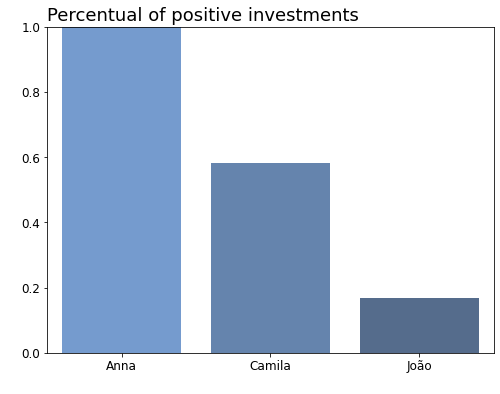

In [150]:
dark = sns.dark_palette("#69d", reverse=True, as_cmap=False)
ax = sns.barplot(y = 'Investment', x = 'Person', data = percent, palette = dark)

ax.set_ylim([0, 1])                                                                            # Changing y limits

ax.set_title("Percentual of positive investments", fontsize = 18, loc = 'left')                # Creating a title for our graph
ax.set_xlabel(" ")                                                                             # Taking the xlabel out of our figure
ax.set_ylabel(" ")                                                                             # Taking the ylabel out of our figure

plt.xticks(fontsize=12)                                                                        # Changing tick size
plt.yticks(fontsize=12)                                                                        # Changing tick size

ax.figure.set_size_inches(8, 6)                                                                # Changing the size of our graph

Nice! Now we see more easily that Anna was able to show positive investments in all months, Camila was able to show positive investments in almost 60% of the months, and João was able to show positive investments only in about 20% of the months. Note that, here, we used a specific color palette. We can see many different options in:

https://seaborn.pydata.org/tutorial/color_palettes.html

Now, let's also evaluate some descriptive statistics for our data:

In [151]:
investment_grouped.Investment.describe( )[['mean', 'std', '50%']].round(2)

,mean,std,50%
Person,,,
Anna,755.83,330.36,735.0
Camila,91.54,255.41,20.0
João,-555.83,628.74,-685.0


By looking at the mean and the median, we have information about how good are the gains for each person. However, note that we lose information about how this data is distributed, which we had when we showd a lineplot.

# Pie plots (and why not to use them)

Ok, now let's look at another dataset. This time, we have information about different movie genres, and how many spectators each genre has:

In [152]:
movie = {'Genres' : ['Comedy', 'Fantasy', 'Action', 'Drama', 'Romance', 'Horror', 'Thriller'],
         'Spectators' : [1094, 546, 310, 652, 998, 783, 625]}

movie_df = pd.DataFrame(movie)

movie_df

,Genres,Spectators
0,Comedy,1094
1,Fantasy,546
2,Action,310
3,Drama,652
4,Romance,998
5,Horror,783
6,Thriller,625


Nice! Now, let's plot a bar plot:

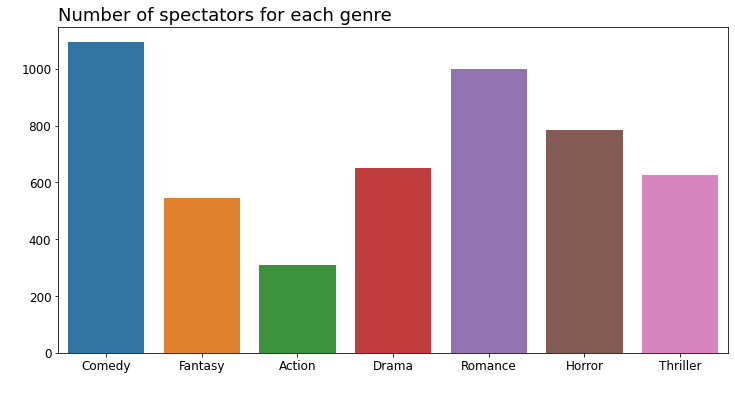

In [153]:
ax = sns.barplot(y = 'Spectators', x = 'Genres', data = movie_df)

ax.set_title("Number of spectators for each genre", fontsize = 18, loc = 'left')               # Creating a title for our graph
ax.set_xlabel(" ")                                                                             # Taking the xlabel out of our figure
ax.set_ylabel(" ")                                                                             # Taking the ylabel out of our figure

plt.xticks(fontsize=12)                                                                        # Changing tick size
plt.yticks(fontsize=12)                                                                        # Changing tick size

ax.figure.set_size_inches(12, 6)                                                                # Changing the size of our graph

Nice! Another option we have is to create a pie plot, which we give us some sense of the percentage of people from the total.

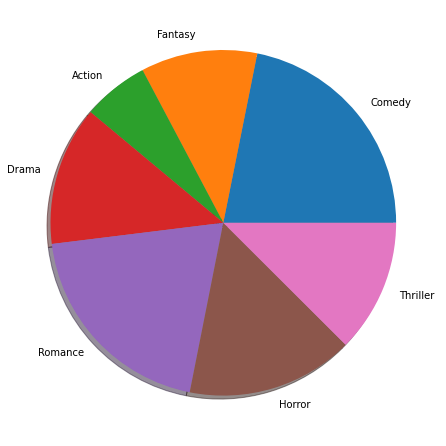

In [154]:
fig1, ax1 = plt.subplots(figsize=(9, 6))
fig1.subplots_adjust(0.3,0,1,1)

plt.pie(movie_df.Spectators, labels = movie_df.Genres, shadow=True);

Nice! We managed how to draw a pie plot, showing the percentages. However, note that a pie plot, by itself, is not able to show that much information. It is hard to understand if comedy has more spectators than romance, or if thriller has more spectators than drama. To solve this, we can add the auto_pct parameter:

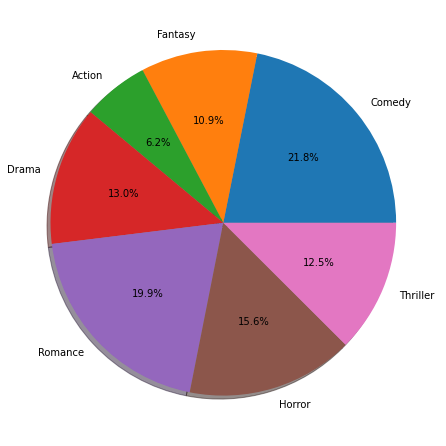

In [155]:
fig1, ax1 = plt.subplots(figsize=(9, 6))
fig1.subplots_adjust(0.3,0,1,1)

plt.pie(movie_df.Spectators, labels = movie_df.Genres, autopct = '%1.1f%%', shadow=True);

However, still, the same information could be passed much more easily with other graphs. In fact, the pie plot is only useful in some conditions:

*   When we have few categories;
*   When we want to understand the relationship between the category and the total;
*   When we want to highlight some categories.

Let's try to do this. First, let's reorganize our data.



In [156]:
movie_df.sort_values('Spectators', inplace = True)         # Sorting our values
explode = (0, 0, 0, 0, 0, 0.1, 0.1)                            # Choosing to explode the slices with the highest frequencies

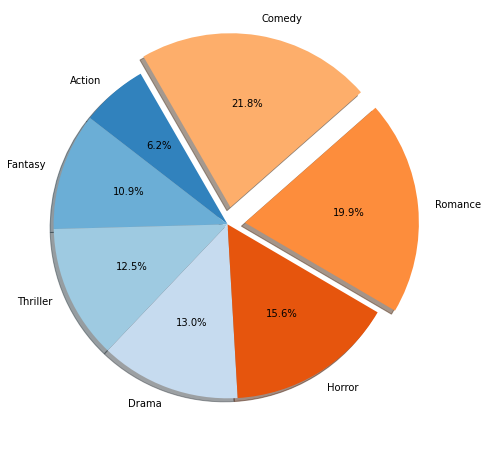

In [157]:
fig1, ax1 = plt.subplots(figsize=(12, 8))

cmap = plt.get_cmap("tab20c")
color = cmap(np.arange(movie_df.shape[0]))
plt.pie(movie_df.Spectators, labels = movie_df.Genres, autopct = '%1.1f%%', shadow=True, explode=explode, startangle=120, colors = color);


Nice! Now, our pie plot is ordered, and our colors help us to see their frequencies. Also, we highlighted  the two highest frequencies! To improve it even further, we can also defined only two classes:

In [158]:
movie_df['AggGenres'] = movie_df['Genres'].apply(lambda x : 'Comedy or Romance' if (x in ['Comedy', 'Romance']) else 'Others')
movie_df

,Genres,Spectators,AggGenres
2,Action,310,Others
1,Fantasy,546,Others
6,Thriller,625,Others
3,Drama,652,Others
5,Horror,783,Others
4,Romance,998,Comedy or Romance
0,Comedy,1094,Comedy or Romance


In [159]:
movie_grouped_agg = movie_df.groupby('AggGenres')
sum_movie_agg = movie_grouped_agg.sum( ).reset_index( )
sum_movie_agg

,AggGenres,Spectators
0,Comedy or Romance,2092
1,Others,2916


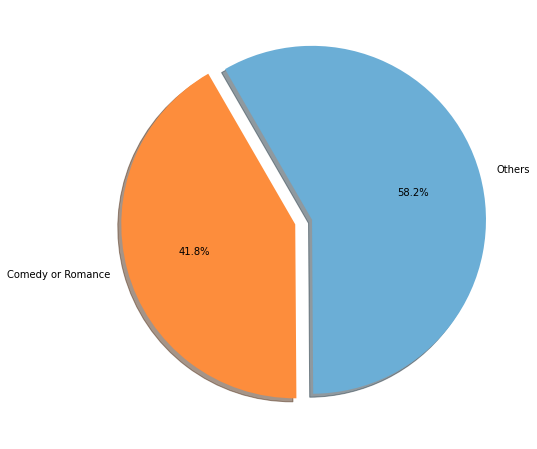

In [160]:
explode = (0, 0.1)

fig1, ax1 = plt.subplots(figsize=(12, 8))

cmap = plt.get_cmap("tab20c")
color = cmap([5, 1])

plt.pie(sum_movie_agg.Spectators, labels = sum_movie_agg.AggGenres, autopct = '%1.1f%%', shadow=True, explode=explode, startangle=120, colors = color);

Now, our pie plot is even easier to understand. Here, however, some information was lost. Still, it all depends on what we think is important for the final user.

# Back to bar plots

Now, let's go back to bar plots. Actually, in most cases, bar plots are much better than pie plots to visualize many categories in our dataset:

In [161]:
movie = {'Genres' : ['Comedy', 'Fantasy', 'Action', 'Drama', 'Romance', 'Horror', 'Thriller'],
         'Spectators' : [1094, 546, 310, 652, 998, 783, 625]}

movie_df = pd.DataFrame(movie)

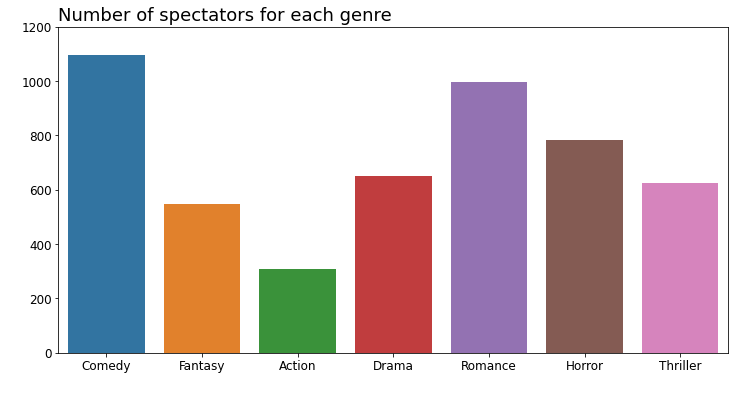

In [162]:
ax = sns.barplot(y = 'Spectators', x = 'Genres', data = movie_df)

ax.set_ylim([0, 1200])

ax.set_title("Number of spectators for each genre", fontsize = 18, loc = 'left')               # Creating a title for our graph
ax.set_xlabel(" ")                                                                             # Taking the xlabel out of our figure
ax.set_ylabel(" ")                                                                             # Taking the ylabel out of our figure

plt.xticks(fontsize=12)                                                                        # Changing tick size
plt.yticks(fontsize=12)                                                                        # Changing tick size

ax.figure.set_size_inches(12, 6)                                                                # Changing the size of our graph

However, in this graph, it might still be hard to visualize which genres have more spectators. For instance, which genre has more spectators, thriler or fantasy?

Let's change our graph a little:

In [163]:
movie_df.sort_values('Spectators', ascending = False, inplace = True)

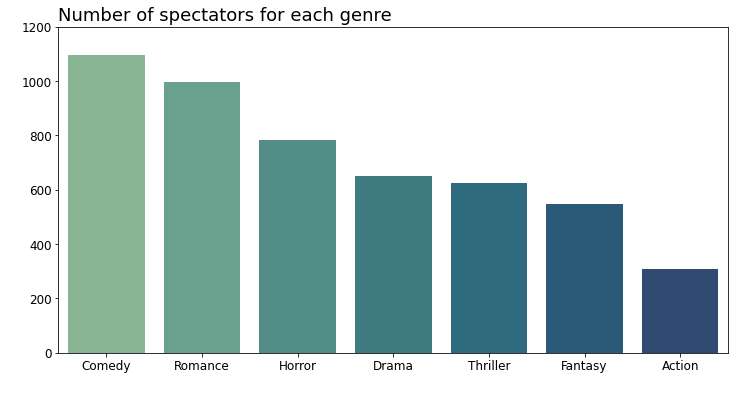

In [164]:
ax = sns.barplot(y = 'Spectators', x = 'Genres', data = movie_df, palette = "crest")

ax.set_ylim([0, 1200])

ax.set_title("Number of spectators for each genre", fontsize = 18, loc = 'left')               # Creating a title for our graph
ax.set_xlabel(" ")                                                                             # Taking the xlabel out of our figure
ax.set_ylabel(" ")                                                                             # Taking the ylabel out of our figure

plt.xticks(fontsize=12)                                                                        # Changing tick size
plt.yticks(fontsize=12)                                                                        # Changing tick size

ax.figure.set_size_inches(12, 6)                                                                # Changing the size of our graph

Nice! Now that we ordered our data, it is easier to understand which genres have more spectators. Also, the palette we used is more pretty. 

Now, let's make our bar graph more similar to a pie plot by plotting the **percentual** of the total:

In [165]:
movie_df['Percentual'] = movie_df.Spectators/movie_df.Spectators.sum( )

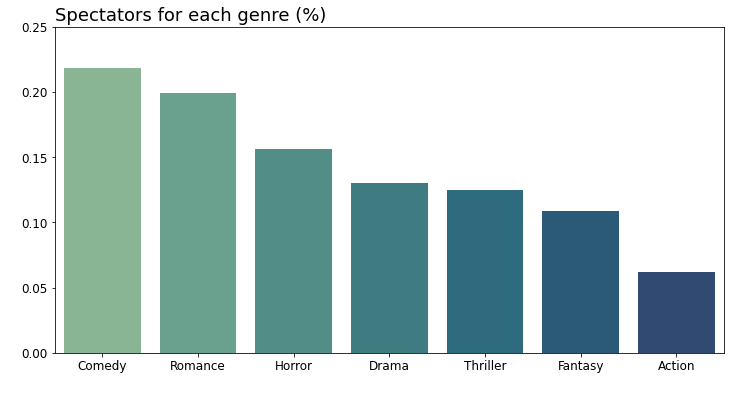

In [166]:
ax = sns.barplot(y = 'Percentual', x = 'Genres', data = movie_df, palette = "crest")

ax.set_ylim([0, 0.25])

ax.set_title("Spectators for each genre (%)", fontsize = 18, loc = 'left')                     # Creating a title for our graph
ax.set_xlabel(" ")                                                                             # Taking the xlabel out of our figure
ax.set_ylabel(" ")                                                                             # Taking the ylabel out of our figure

plt.xticks(fontsize=12)                                                                        # Changing tick size
plt.yticks(fontsize=12)                                                                        # Changing tick size

ax.figure.set_size_inches(12, 6)                                                               # Changing the size of our graph

Since our $x$-axis has a label, we might want to use a horizontal bar plot, which makes the labels easier to look at. Also, note that, if we want to highlight a specific bar, we can set a user-defined palette:

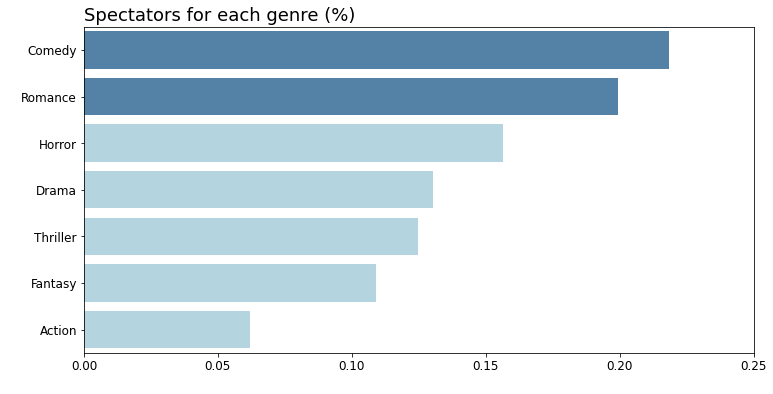

In [171]:
clrs = ['steelblue', 'steelblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
ax = sns.barplot(y = 'Genres', x = 'Percentual', data = movie_df, palette = clrs)

ax.set_xlim([0, 0.25])

ax.set_title("Spectators for each genre (%)", fontsize = 18, loc = 'left')                     # Creating a title for our graph
ax.set_xlabel(" ")                                                                             # Taking the xlabel out of our figure
ax.set_ylabel(" ")                                                                             # Taking the ylabel out of our figure

plt.xticks(fontsize=12)                                                                        # Changing tick size
plt.yticks(fontsize=12)                                                                        # Changing tick size

ax.figure.set_size_inches(12, 6)                                                               # Changing the size of our graph